In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
#Initializing the Neural Network
classifier = Sequential()

#Adding a Convolution Layer
classifier.add(Conv2D(32, (3, 3), input_shape = (256, 256, 3), activation='relu'))

#Pooling to Reduce the Size of the Feature Map
classifier.add(MaxPooling2D(pool_size=(2,2)))

#Flattening the Feature Maps
classifier.add(Flatten())

#Adding Layers to the Neural Network
classifier.add(Dense(units = 128, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))

#Compiling the CNN
classifier.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [3]:
#Fitting the CNN
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory('training_set', target_size=(256, 256), batch_size=32, class_mode='binary')

Found 12 images belonging to 2 classes.


In [4]:
test_set = test_datagen.flow_from_directory('test_set', target_size=(256, 256), batch_size=32, class_mode='binary')

Found 4 images belonging to 2 classes.


In [5]:
Model_train = classifier.fit_generator(training_set, 
                                       steps_per_epoch=40, 
                                       epochs=25, 
                                       validation_data=test_set, 
                                       validation_steps=1000)


Epoch 1/25
40/40 [==============================] - 155s 4s/step - loss: 7.2464 - accuracy: 0.7750 - val_loss: 0.7829 - val_accuracy: 0.5000
Epoch 2/25
40/40 [==============================] - 153s 4s/step - loss: 0.0256 - accuracy: 0.9896 - val_loss: 0.1386 - val_accuracy: 1.0000
Epoch 3/25
40/40 [==============================] - 152s 4s/step - loss: 7.0619e-04 - accuracy: 1.0000 - val_loss: 0.1917 - val_accuracy: 1.0000
Epoch 4/25
40/40 [==============================] - 153s 4s/step - loss: 1.9236e-04 - accuracy: 1.0000 - val_loss: 0.1755 - val_accuracy: 1.0000
Epoch 5/25
40/40 [==============================] - 152s 4s/step - loss: 2.1445e-04 - accuracy: 1.0000 - val_loss: 0.1537 - val_accuracy: 1.0000
Epoch 6/25
40/40 [==============================] - 152s 4s/step - loss: 1.5214e-04 - accuracy: 1.0000 - val_loss: 0.1461 - val_accuracy: 1.0000
Epoch 7/25
40/40 [==============================] - 152s 4s/step - loss: 1.6587e-04 - accuracy: 1.0000 - val_loss: 0.1288 - val_accuracy: 

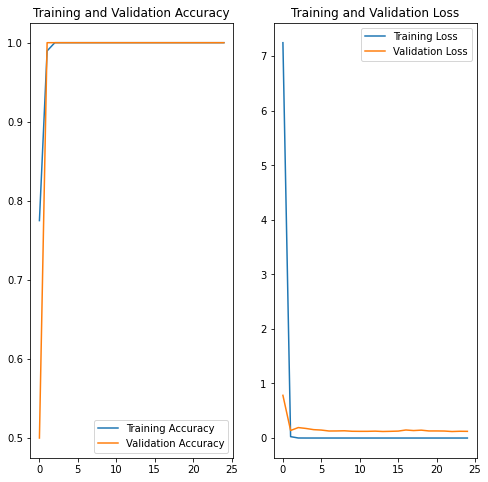

In [6]:
#Visualize training results
acc = Model_train.history['accuracy']
val_acc = Model_train.history['val_accuracy']

loss=Model_train.history['loss']
val_loss=Model_train.history['val_loss']

epochs_range = range(25)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [7]:
import numpy as np
from keras.preprocessing import image

#Making a Prediction
test_image = image.load_img('dog.jpg', target_size=(256, 256))

In [8]:
test_image = image.img_to_array(test_image)

test_image = np.expand_dims(test_image, axis=0)

prediction = classifier.predict(test_image)

training_set.class_indices

{'cats': 0, 'dogs': 1}